In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn import model_selection
from matplotlib import pyplot as plt

In [8]:
data = pd.read_csv("/Users/coledixon/Documents/ml-project/Cole_feature_selection/PCA_components_training.csv")
data.set_index("PDB codes",inplace=True)
#try scaling data first
data = (data-data.min())/(data.max()-data.min())

train, val = model_selection.train_test_split(data, train_size=0.7)
X_train, X_val = train.iloc[:,:-1], val.iloc[:,:-1]
Y_train, Y_val = train["Output"], val["Output"]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

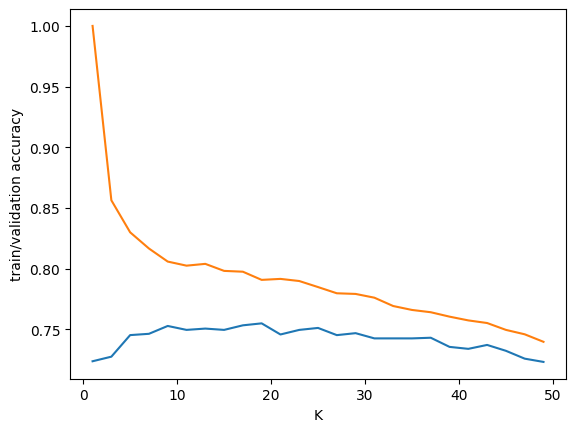

In [9]:
val_acc = []
train_acc = []
k_values = np.arange(1,50,2)
for k in k_values:
    knn = KNeighborsClassifier(k)
    cv_score = model_selection.cross_validate(knn,data.iloc[:,:-1],data["Output"],cv=5,return_train_score=True)
    val_acc.append(np.mean(cv_score["test_score"]))
    train_acc.append(np.mean(cv_score["train_score"]))
    '''knn.fit(X_train,Y_train)
    pred = knn.predict(X_train)
    train_acc.append((np.sum(pred == Y_train))/len(pred))
    pred = knn.predict(X_val)
    val_acc.append((np.sum(pred == Y_val))/len(pred))'''

plt.plot(k_values,val_acc)
plt.plot(k_values,train_acc)
plt.xlabel("K")
plt.ylabel("train/validation accuracy")
plt.show()

In [10]:
print("optimal value of k is:",k_values[np.argmax(val_acc)],"with validation accuracy :",val_acc[np.argmax(val_acc)])

optimal value of k is: 19 with validation accuracy : 0.7548401588267687
